### Prepare soil input for discretization ###
Prepare soil input data for the domain area. This step includes:<br>
1. project large-domain soil class raster into a specified projection system.
2. extract soil input for the domain area.
3. check domain soil.

In [8]:
# import libraries
import os
import geospatial_functions.geospatial_analysis as ga
import geospatial_functions.utils as ut
import rasterio as rio
from rasterio.warp import Resampling

In [9]:
# common paths
control_file = 'control_active.txt'
root_path = ut.read_from_control(control_file, 'root_path')
source_path = ut.read_from_control(control_file, 'source_path')
domain_name = ut.read_from_control(control_file, 'domain_name')
domain_path = os.path.join(root_path, domain_name)
plot_path = os.path.join(domain_path, 'plot')

In [10]:
# projection system
proj4=ut.read_from_control(control_file, 'proj4') 
dst_crs = rio.crs.CRS.from_string(proj4)

In [11]:
# large-domain data
soil_raster = ut.read_from_control(control_file, 'soil_raster')
soil_prj_raster = ut.read_from_control(control_file, 'soil_prj_raster')
if soil_prj_raster == 'default': 
    soil_prj_raster = os.path.join(source_path, os.path.basename(soil_raster).split('.tif')[0]+'_prj.tif')

# domain data
domain_gru_prj_shp = ut.specify_file_path(control_file, 'domain_gru_prj_shp')  
domain_soil_raster = ut.specify_file_path(control_file, 'domain_soil_raster')  

#### 1. Project larage-domain soil #### 

In [5]:
# ga.reproject_raster(soil_raster, soil_prj_raster, dst_crs, Resampling.nearest)                         

#### 2. Extract domain soil ####

In [6]:
ga.crop_raster(soil_prj_raster, domain_gru_prj_shp, domain_soil_raster) 

#### 3. Check domain soil ####

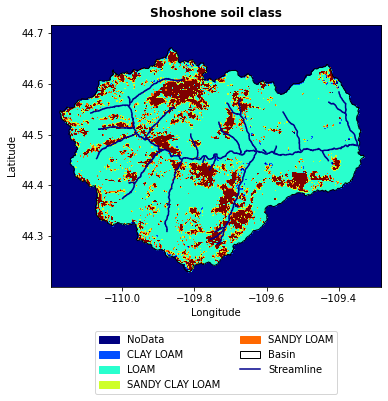

In [12]:
import geospatial_functions.geospatial_plot as gp
domain_stream_shp = ut.specify_file_path(control_file, 'domain_stream_shp')

wgs_crs = 'epsg:4326'
figsize=(9,9*0.6) # width, height in inches
title = domain_name.capitalize()+' soil class'
leg_ncol=2
leg_loc='upper center'
leg_bbox_to_anchor=(0.5,-0.15)

legend_dict = {0: "NoData",
            1: 'CLAY',
            2: 'CLAY LOAM',
            3: 'LOAM',
            4: 'LOAMY SAND',
            5: 'SAND',
            6: 'SANDY CLAY',
            7: 'SANDY CLAY LOAM',
            8: 'SANDY LOAM',
            9: 'SILT',
            10: 'SILTY CLAY',
            11: 'SILTY CLAY LOAM',
            12: 'SILT LOAM'}   

# plot classified aspect
ofile = os.path.join(plot_path, 'soil_class_and_bound_stream.png')   

inraster,bound_vector,stream_vector,wgs_crs,cmap_str,input_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile=\
domain_soil_raster,domain_gru_prj_shp,domain_stream_shp,wgs_crs,'jet',legend_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile

gp.plot_raster_and_bound_stream(inraster,bound_vector,stream_vector,wgs_crs,cmap_str,input_dict,
                                figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)